In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
print("Library imported")

Library imported


In [123]:
df = pd.read_csv('twitter_training.csv', names=['id','source','sentiment', 'text'])
df=df[['sentiment','text']]
possible_labels = df.sentiment.unique()
df = df[~df.sentiment.str.contains('Irrelevant')]

possible_labels = df.sentiment.unique()
no_labels = len(possible_labels)
one_hot=np.eye(no_labels)

label_dict = {'Positive':[1,0,0],'Negative':[0,1,0],'Neutral':[0,0,1]}

df['label'] = df['sentiment'].apply(lambda x: label_dict.get(x))
df=df.iloc[:,[1,0,2]]
display(df)
print(df.shape)

,text,sentiment,label
0,im getting on borderlands and i will murder yo...,Positive,"[1, 0, 0]"
1,I am coming to the borders and I will kill you...,Positive,"[1, 0, 0]"
2,im getting on borderlands and i will kill you ...,Positive,"[1, 0, 0]"
3,im coming on borderlands and i will murder you...,Positive,"[1, 0, 0]"
4,im getting on borderlands 2 and i will murder ...,Positive,"[1, 0, 0]"
...,...,...,...
74677,Just realized that the Windows partition of my...,Positive,"[1, 0, 0]"
74678,Just realized that my Mac window partition is ...,Positive,"[1, 0, 0]"
74679,Just realized the windows partition of my Mac ...,Positive,"[1, 0, 0]"
74680,Just realized between the windows partition of...,Positive,"[1, 0, 0]"


(61692, 3)


In [124]:
#Deleteing NAN values
print("Checking for NAN values")
print(df.isnull().sum())
df=df.dropna()
print("\nAfter dropping NAN values")
print(df.isnull().sum())


Checking for NAN values
text         571
sentiment      0
label          0
dtype: int64

After dropping NAN values
text         0
sentiment    0
label        0
dtype: int64


In [125]:
X= df['text']
y=df['label']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.95, shuffle=True)

print(X_train.shape)


(3056,)


In [127]:
import re
all_sent=[]
corpus=""
for i in X_train:
    i=str(i).lower()
    i=i.replace("/"," ")
    i=i.replace("."," ")
    text = re.sub(r'[^a-zA-Z" "]', '', i)
    all_sent.append(text)
    corpus = corpus + " "+text


corpus=corpus.lower()
corpus=corpus.strip("   ")

In [128]:
corpus_words = corpus.split()
corpus_words

['mark',
 'zuckerberg',
 'has',
 'proved',
 'dismissive',
 'of',
 'the',
 'problem',
 'for',
 'a',
 'long',
 'time',
 'along',
 'with',
 'sheryl',
 'sandberg',
 'who',
 'encouraged',
 'conspiracy',
 'theories',
 'about',
 'george',
 'soros',
 'on',
 'facebook',
 'facebook',
 'has',
 'never',
 'been',
 'a',
 '"neutral"',
 'platform',
 'consider',
 'men',
 'stole',
 'the',
 'idea',
 'creating',
 'fb',
 'and',
 'initially',
 'used',
 'it',
 'to',
 'ridicule',
 'women',
 'now',
 'a',
 'great',
 'session',
 'about',
 'buncee',
 'buncebryan',
 'l',
 'rhandlerr',
 'wtf',
 'pic',
 'twitter',
 'com',
 'uxlgpdu',
 'just',
 'remember',
 'eb',
 'games',
 'could',
 'have',
 'learned',
 'a',
 'lesson',
 'from',
 'running',
 'ps',
 'for',
 'the',
 'xbox',
 'series',
 'x',
 'but',
 'they',
 'didnt',
 'cause',
 'that',
 'they',
 'dont',
 'give',
 'a',
 'shit',
 'about',
 'you',
 'collabnews',
 'has',
 'released',
 'paper',
 'li',
 'fe',
 'many',
 'in',
 'mipnews',
 'pcouril',
 'deepgem',
 'you',
 'the'

In [129]:
#frequency of each words in corpus
token_freq={}
for i in corpus_words:
    if i in token_freq:
        token_freq[i]+=1
    else:
        token_freq[i]=1

print(token_freq)

{'mark': 4, 'zuckerberg': 1, 'has': 127, 'proved': 4, 'dismissive': 1, 'of': 791, 'the': 1837, 'problem': 34, 'for': 635, 'a': 1011, 'long': 26, 'time': 128, 'along': 8, 'with': 411, 'sheryl': 1, 'sandberg': 1, 'who': 60, 'encouraged': 1, 'conspiracy': 1, 'theories': 1, 'about': 137, 'george': 3, 'soros': 1, 'on': 447, 'facebook': 103, 'never': 64, 'been': 112, '"neutral"': 1, 'platform': 5, 'consider': 2, 'men': 8, 'stole': 4, 'idea': 15, 'creating': 8, 'fb': 3, 'and': 1072, 'initially': 2, 'used': 17, 'it': 620, 'to': 1187, 'ridicule': 2, 'women': 6, 'now': 169, 'great': 98, 'session': 4, 'buncee': 1, 'buncebryan': 1, 'l': 7, 'rhandlerr': 67, 'wtf': 36, 'pic': 192, 'twitter': 179, 'com': 404, 'uxlgpdu': 1, 'just': 251, 'remember': 11, 'eb': 2, 'games': 107, 'could': 48, 'have': 278, 'learned': 3, 'lesson': 5, 'from': 201, 'running': 15, 'ps': 91, 'xbox': 89, 'series': 52, 'x': 57, 'but': 267, 'they': 159, 'didnt': 42, 'cause': 16, 'that': 387, 'dont': 106, 'give': 49, 'shit': 116, 'y

In [130]:
stopwords=[]
for i in token_freq:
    if token_freq[i]>300 or len(i)<3: #this numerical values aretrial and error method
        stopwords.append(i)
print(stopwords)        


['of', 'the', 'for', 'a', 'with', 'on', 'fb', 'and', 'it', 'to', 'l', 'com', 'eb', 'ps', 'x', 'that', 'you', 'li', 'fe', 'in', 'be', 'oh', 'so', 'i', 'this', 'do', 'is', 'my', 'an', 'me', 'im', 'go', 'tv', 'or', 'rt', 'we', 'at', 'f', 'if', 'pm', 'up', 'no', 'u', 'c', 'as', 'pc', 'xb', 'ut', 'am', 'sr', 't', 'co', 'game', 'gg', 'st', 'd', 'cs', 'vs', 's', 'se', 'he', '"', 'p', 'ly', 'e', 'ai', 'th', 'rb', 'm', 'hz', 'ru', 'rs', 'by', 'mw', 'fo', 'r', 'us', 'v', 'n', 'yo', 'gb', 'k', 're', 'el', 'vi', 'de', 'id', 'nk', 'pg', 'mr', 'vz', 'hi', 've', 'da', 'en', 'cd', 'ff', 'tf', 'na', 'y', 'vc', 'md', 'uk', 'ac', 'h', 'af', 'wn', 'nr', 'ea', 'g', 'ik', 'zm', 'bc', 'al', 'cm', 'ys', 'ca', 'te', 'un', 'yr', 'rn', 'xp', 'tt', 'ya', 'vh', 'gr', '"i', 'mp', 'll', 'gs', 'ms', 'eu', 'xd', '"a', 'du', 'wr', 'pa', 'ez', 'b', 'ur', 'qb', 'ht', 'jo', 'pr', 'fw', 'ce', 'dr', 'au', 'vt', 'la', 'ok', 'bp', 'rx', 'j', 'o', 'hp', 'rk', 'io', 'uc', 'mx', 'ui', 'sf', 'ak', 'lo', 'dp', 'er', 'bs', 'dk', 'm

In [131]:
#removing stopwords from the corpus
filtered_corpus=[]
for i in corpus_words:
   
    if not i in stopwords:
        filtered_corpus.append(i)

print(filtered_corpus)


['mark', 'zuckerberg', 'has', 'proved', 'dismissive', 'problem', 'long', 'time', 'along', 'sheryl', 'sandberg', 'who', 'encouraged', 'conspiracy', 'theories', 'about', 'george', 'soros', 'facebook', 'facebook', 'has', 'never', 'been', '"neutral"', 'platform', 'consider', 'men', 'stole', 'idea', 'creating', 'initially', 'used', 'ridicule', 'women', 'now', 'great', 'session', 'about', 'buncee', 'buncebryan', 'rhandlerr', 'wtf', 'pic', 'twitter', 'uxlgpdu', 'just', 'remember', 'games', 'could', 'have', 'learned', 'lesson', 'from', 'running', 'xbox', 'series', 'but', 'they', 'didnt', 'cause', 'they', 'dont', 'give', 'shit', 'about', 'collabnews', 'has', 'released', 'paper', 'many', 'mipnews', 'pcouril', 'deepgem', 'poor', 'nvidia', 'day', 'like', 'broken', 'again', 'pic', 'twitter', 'uklawquxd', 'its', 'incumbent', 'customers', 'back', 'down', 'employees', 'when', 'shitty', 'businesses', 'act', 'way', 'customers', 'shouldnt', 'stay', 'silent', 'employees', 'can', 'only', 'much', 'jimcramer

In [132]:
#frequency of filtered corpus
filtered_corpus_freq={}

for i in filtered_corpus:
    if i in filtered_corpus_freq:
        filtered_corpus_freq[i]+=1
    else:
        filtered_corpus_freq[i]=1

print(filtered_corpus_freq)

{'mark': 4, 'zuckerberg': 1, 'has': 127, 'proved': 4, 'dismissive': 1, 'problem': 34, 'long': 26, 'time': 128, 'along': 8, 'sheryl': 1, 'sandberg': 1, 'who': 60, 'encouraged': 1, 'conspiracy': 1, 'theories': 1, 'about': 137, 'george': 3, 'soros': 1, 'facebook': 103, 'never': 64, 'been': 112, '"neutral"': 1, 'platform': 5, 'consider': 2, 'men': 8, 'stole': 4, 'idea': 15, 'creating': 8, 'initially': 2, 'used': 17, 'ridicule': 2, 'women': 6, 'now': 169, 'great': 98, 'session': 4, 'buncee': 1, 'buncebryan': 1, 'rhandlerr': 67, 'wtf': 36, 'pic': 192, 'twitter': 179, 'uxlgpdu': 1, 'just': 251, 'remember': 11, 'games': 107, 'could': 48, 'have': 278, 'learned': 3, 'lesson': 5, 'from': 201, 'running': 15, 'xbox': 89, 'series': 52, 'but': 267, 'they': 159, 'didnt': 42, 'cause': 16, 'dont': 106, 'give': 49, 'shit': 116, 'collabnews': 1, 'released': 9, 'paper': 6, 'many': 47, 'mipnews': 1, 'pcouril': 1, 'deepgem': 1, 'poor': 8, 'nvidia': 75, 'day': 66, 'like': 185, 'broken': 16, 'again': 78, 'ukla

In [133]:
#creating tokens and assigning indices

tokens=[]
indices={} #tokens with index

for i in filtered_corpus_freq:
    tokens.append(i)


for i,j in enumerate (tokens):
    indices[i]=j
print(indices)   


{0: 'mark', 1: 'zuckerberg', 2: 'has', 3: 'proved', 4: 'dismissive', 5: 'problem', 6: 'long', 7: 'time', 8: 'along', 9: 'sheryl', 10: 'sandberg', 11: 'who', 12: 'encouraged', 13: 'conspiracy', 14: 'theories', 15: 'about', 16: 'george', 17: 'soros', 18: 'facebook', 19: 'never', 20: 'been', 21: '"neutral"', 22: 'platform', 23: 'consider', 24: 'men', 25: 'stole', 26: 'idea', 27: 'creating', 28: 'initially', 29: 'used', 30: 'ridicule', 31: 'women', 32: 'now', 33: 'great', 34: 'session', 35: 'buncee', 36: 'buncebryan', 37: 'rhandlerr', 38: 'wtf', 39: 'pic', 40: 'twitter', 41: 'uxlgpdu', 42: 'just', 43: 'remember', 44: 'games', 45: 'could', 46: 'have', 47: 'learned', 48: 'lesson', 49: 'from', 50: 'running', 51: 'xbox', 52: 'series', 53: 'but', 54: 'they', 55: 'didnt', 56: 'cause', 57: 'dont', 58: 'give', 59: 'shit', 60: 'collabnews', 61: 'released', 62: 'paper', 63: 'many', 64: 'mipnews', 65: 'pcouril', 66: 'deepgem', 67: 'poor', 68: 'nvidia', 69: 'day', 70: 'like', 71: 'broken', 72: 'again'

In [134]:
no_of_tokens=len(tokens)
print("no of tokens after removing stopwords : ",no_of_tokens)

no of tokens after removing stopwords :  8046


In [135]:
#one hot encoding
one_hot=np.eye(no_of_tokens)

In [136]:
#filtered tot sentence
 # remove stopwords from each text in the dataset
pure_totsent=[] #append all text in corpus after removing stopwords
m=0
for i in all_sent:
    pure_sent=[]
    m+=1
    words=i.split()
    
    
    for j in words:
        if j not in stopwords:
            pure_sent.append(j)
    
    
    pure_totsent.append(pure_sent)     
    
print(pure_totsent)

[['mark', 'zuckerberg', 'has', 'proved', 'dismissive', 'problem', 'long', 'time', 'along', 'sheryl', 'sandberg', 'who', 'encouraged', 'conspiracy', 'theories', 'about', 'george', 'soros', 'facebook', 'facebook', 'has', 'never', 'been', '"neutral"', 'platform', 'consider', 'men', 'stole', 'idea', 'creating', 'initially', 'used', 'ridicule', 'women'], ['now', 'great', 'session', 'about', 'buncee', 'buncebryan'], ['rhandlerr', 'wtf', 'pic', 'twitter', 'uxlgpdu'], ['just', 'remember', 'games', 'could', 'have', 'learned', 'lesson', 'from', 'running', 'xbox', 'series', 'but', 'they', 'didnt', 'cause', 'they', 'dont', 'give', 'shit', 'about'], ['collabnews', 'has', 'released', 'paper', 'many', 'mipnews', 'pcouril', 'deepgem'], ['poor'], ['nvidia', 'day', 'like', 'broken', 'again', 'pic', 'twitter', 'uklawquxd'], ['its', 'incumbent', 'customers', 'back', 'down', 'employees', 'when', 'shitty', 'businesses', 'act', 'way', 'customers', 'shouldnt', 'stay', 'silent', 'employees', 'can', 'only', 'mu

In [137]:
for i in pure_totsent: #filteres corpus
    print(i)

['mark', 'zuckerberg', 'has', 'proved', 'dismissive', 'problem', 'long', 'time', 'along', 'sheryl', 'sandberg', 'who', 'encouraged', 'conspiracy', 'theories', 'about', 'george', 'soros', 'facebook', 'facebook', 'has', 'never', 'been', '"neutral"', 'platform', 'consider', 'men', 'stole', 'idea', 'creating', 'initially', 'used', 'ridicule', 'women']
['now', 'great', 'session', 'about', 'buncee', 'buncebryan']
['rhandlerr', 'wtf', 'pic', 'twitter', 'uxlgpdu']
['just', 'remember', 'games', 'could', 'have', 'learned', 'lesson', 'from', 'running', 'xbox', 'series', 'but', 'they', 'didnt', 'cause', 'they', 'dont', 'give', 'shit', 'about']
['collabnews', 'has', 'released', 'paper', 'many', 'mipnews', 'pcouril', 'deepgem']
['poor']
['nvidia', 'day', 'like', 'broken', 'again', 'pic', 'twitter', 'uklawquxd']
['its', 'incumbent', 'customers', 'back', 'down', 'employees', 'when', 'shitty', 'businesses', 'act', 'way', 'customers', 'shouldnt', 'stay', 'silent', 'employees', 'can', 'only', 'much']
['j

In [138]:
def softmax(a):
  a=a/np.linalg.norm(a,axis=0,keepdims=True)

  if len(a.shape)>1:
    max_matrix=np.max(a,axis=0) #compare all the rows for each column and takes the bigger value for each column make a single vector
    stable = a-max_matrix
    e=np.exp(stable)
    A= e/np.sum(e,axis=0)
  else : #If there is only one matrix
    max_matrix=np.max(a) #Take the max_value from the single vector
    stable = a-max_matrix
    e=np.exp(stable)
    A= e/np.sum(e)

  return A

In [155]:
np.random.seed(42)

lr=0.01
epoch_avgcost={} #for plotting the graph
total_cost=0
n_dim=1000
weight1=np.random.rand(no_of_tokens,n_dim)-.5
weight2=np.random.rand(n_dim,no_of_tokens)-.5

no_of_epochs=65

for epoch in range(no_of_epochs):
    avg_cost=[]
    for center_word in tokens:
        center_word_token_id = tokens.index(center_word)
        one_hot_center=one_hot[center_word_token_id ]
        centerword_embed=np.dot(one_hot_center,weight1)

        all_contexts = []
        for i in pure_totsent:
            if center_word in i:
                all_contexts.append(i)

        all_contexts_len=len(all_contexts)
        context_rnum = np.random.randint(all_contexts_len)
        context=all_contexts[context_rnum]

        center_wordid_in_context=context.index(center_word)


        #selecting the context words according to window size
        window = 3
        context_words=[]
        context_words=context[max(0,(center_wordid_in_context-window)):center_wordid_in_context]+context[center_wordid_in_context+1:center_wordid_in_context+window+1]


        word_check_centerword = np.dot(centerword_embed,weight2) #passing embedded center word throgh weight 2 to convert into original dimension)
        Soft_max=softmax(word_check_centerword)

        total_cost=[]
        cost=0
    #change made==================================
        for i in context_words:
            cost=(-np.log(Soft_max[tokens.index(i)]))
            total_cost.append(cost)
            if np.sum(total_cost)!=0:
                avg_cost.append(np.average(total_cost))

        


        #finding loss
        loss=Soft_max
        for i in context_words:
         loss[tokens.index(i)]-=1



        #finding gradient of loss and weight1 & subtracting from weight2
        dw2=np.dot(loss,weight1)


        weight2.T[center_word_token_id]=weight2.T[center_word_token_id]-dw2*lr

        #finding gradient of loss and weight1 & subtracting from weight2
        dw1=np.dot(loss,weight2.T)

        weight1[center_word_token_id]=weight1[center_word_token_id]-dw1*lr

  

    epoch_avgcost[epoch]=np.average(avg_cost)
    print(epoch,'----------',np.average(avg_cost))
        
    

0 ---------- 8.992478838087973
1 ---------- 8.98882331945357
2 ---------- 8.985233712746567
3 ---------- 8.981741023931185
4 ---------- 8.978325046027035
5 ---------- 8.974852532708834
6 ---------- 8.971352225164873
7 ---------- 8.9679212771165
8 ---------- 8.96459338604444
9 ---------- 8.961309196196124
10 ---------- 8.958042480997465
11 ---------- 8.954845386761916
12 ---------- 8.951612243891473
13 ---------- 8.948721217994699
14 ---------- 8.945602894371609
15 ---------- 8.942663101604019
16 ---------- 8.939872177849663
17 ---------- 8.9371213284998
18 ---------- 8.934315939710142
19 ---------- 8.932178805590183
20 ---------- 8.929552570445189
21 ---------- 8.926933842308795
22 ---------- 8.924683782196022
23 ---------- 8.922560713592862
24 ---------- 8.920374376160582
25 ---------- 8.918145749355471
26 ---------- 8.916566889080006
27 ---------- 8.914661563142426
28 ---------- 8.913003826129483
29 ---------- 8.911541942037724
30 ---------- 8.909909767122246
31 ---------- 8.90831534

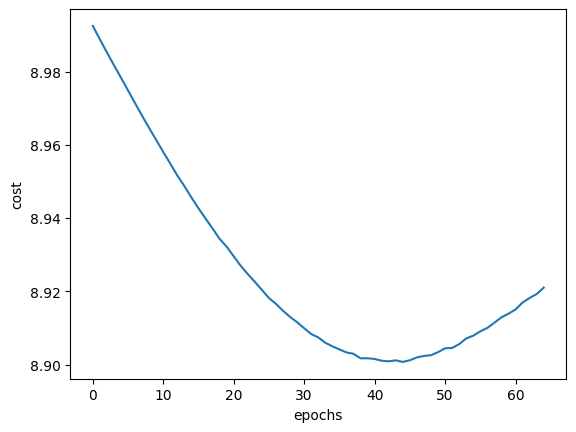

In [156]:
import matplotlib.pyplot as plt
plt.plot(epoch_avgcost.keys(),epoch_avgcost.values(),label="learning rate = {}".format(lr))
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

In [158]:
#testing word2vec

index_no=1500
word=tokens[index_no]

print("center word : ",word)
word2vec=np.dot(one_hot,weight1)
initial_dim=np.dot(word2vec,weight2)
prob=softmax(initial_dim[index_no])

max_prob_index=np.argmax(prob)

print()
print("testing by checking the maximum probabilities")
print("---------------Context Words-----------------")
for i in range(5):
    max_prob_index=np.argmax(prob) 
    if(tokens[max_prob_index]!=word):
       print(tokens[max_prob_index])  
    
    prob[max_prob_index]=0
print(" --------------Context Sentences-------------")
for i in all_sent:
   if word in i:
      print(all_sent[all_sent.index(i)])    

center word :  mercy

testing by checking the maximum probabilities
---------------Context Words-----------------
atlantic
pink
ambarkortiz
beanie
 --------------Context Sentences-------------
playoverwatch is there like any way around to bring back pink blood mercy and   from or atlantic mercy id honestly pay good money for those damn skins  ik say i only started off since september christmas  tonight but they are very v beautiful
for my mercy ambarkortiz was so still mad at hugging me for making her pocket brain a bastion du lol   pixel spray pepper and cute spray 
mercy is the best most skilled character in overwatch because she requires prioritization and quick decision what make game sense and i love mercy so much because shes cute and shes my cat and very happy my babycakes mom plays her because pockets me while i miss everything


In [154]:
index_no=424
word=tokens[index_no]

print("center word : ",word)
word2vec=np.dot(one_hot,weight1)
initial_dim=np.dot(word2vec,weight2)
prob=softmax(initial_dim[index_no])

max_prob_index=np.argmax(prob)

print()
print("testing by checking the maximum probabilities")
print("---------------Context Words-----------------")
for i in range(5):
    max_prob_index=np.argmax(prob) 
    if(tokens[max_prob_index]!=word):
       print(tokens[max_prob_index])  
    
    prob[max_prob_index]=0
print(" --------------Context Sentences-------------")
for i in all_sent:
   if word in i:
      print(all_sent[all_sent.index(i)])    

center word :  hero

testing by checking the maximum probabilities
---------------Context Words-----------------
token
stained
costs
mst
classes
 --------------Context Sentences-------------
odd that hunter   damage hero and power  i freaking love saving this deck   for youtu  to be    wigbhrgyh 
precovid student game day introducing students to robot entertainment game as our own form of leauge of legends dota for our ell program  they really loved it   check it out  ready set heroes   lnkd in gxjtnm   
his biggest gold grubber yet and best game with reno jackson for using his new updated zero cost gold hero saving power
hearthstone duels opinions    often really fun   and really challenging   tests up your deckbuilding decisions better than standard   wild   a shaman leader feels overtuned feeling compared to all other hero classes  that hero playing power is overwhelming to not say the least 
playhearthstone a  mana hero power only deals one damage its a   token hero power that cost